In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tweets = pd.read_csv("covid19_tweets.csv")

In [3]:
tweets.shape

(147601, 13)

In [4]:
tweets.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In this note I will be investigating a set of Twitter tweets that uses the hashtag "COVID19" and plotting the location of the tweeters in a map.

In [5]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147601 entries, 0 to 147600
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         147601 non-null  object
 1   user_location     117611 non-null  object
 2   user_description  139236 non-null  object
 3   user_created      147601 non-null  object
 4   user_followers    147601 non-null  int64 
 5   user_friends      147601 non-null  int64 
 6   user_favourites   147601 non-null  int64 
 7   user_verified     147601 non-null  bool  
 8   date              147601 non-null  object
 9   text              147601 non-null  object
 10  hashtags          105393 non-null  object
 11  source            147553 non-null  object
 12  is_retweet        147601 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 12.7+ MB


In [6]:
tweets.describe()

,user_followers,user_friends,user_favourites
count,1.476010e+05,147601.000000,1.476010e+05
mean,1.096936e+05,2089.351569,1.415404e+04
std,8.350865e+05,9067.479411,4.357275e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.730000e+02,148.000000,2.020000e+02
50%,1.003000e+03,541.000000,1.750000e+03
75%,5.353000e+03,1712.000000,9.148000e+03
max,4.944256e+07,497363.000000,2.047197e+06


In [7]:
pd.isnull(tweets).sum()

user_name               0
user_location       29990
user_description     8365
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            42208
source                 48
is_retweet              0
dtype: int64

In [8]:
#plot missing values

def return_missing_values(data_frame):
    missing_values = data_frame.isnull().sum()/len(data_frame)
    missing_values = missing_values[missing_values>0]
    missing_values.sort_values(inplace=True)
    return missing_values

In [9]:
return_missing_values(tweets)

source              0.000325
user_description    0.056673
user_location       0.203183
hashtags            0.285960
dtype: float64

In [10]:
def plot_missing_values(data_frame):
    missing_values = return_missing_values(data_frame)
    missing_values = missing_values.to_frame()
    missing_values.columns = ['count']
    missing_values.index.names = ['Name']
    missing_values['Name'] = missing_values.index
    sns.set(style='whitegrid', color_codes=True)
    sns.barplot(x='Name', y='count', data=missing_values)
    plt.xticks(rotation=90)
    plt.show()

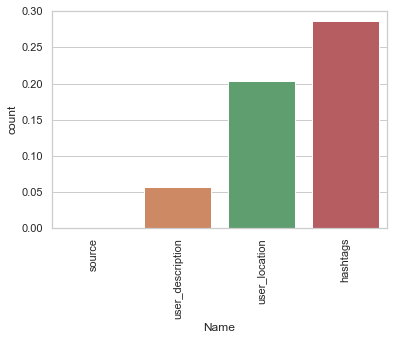

In [11]:
plot_missing_values(tweets)


# Plot unique values

In [15]:
def return_unique_values(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe

In [16]:
udf = return_unique_values(tweets)
udf

,Features,Uniques
0,user_name,78968
1,user_location,23555
2,user_description,75880
3,user_created,80183
4,user_followers,24737
5,user_friends,10062
6,user_favourites,31284
7,user_verified,2
8,date,111526
9,text,147274


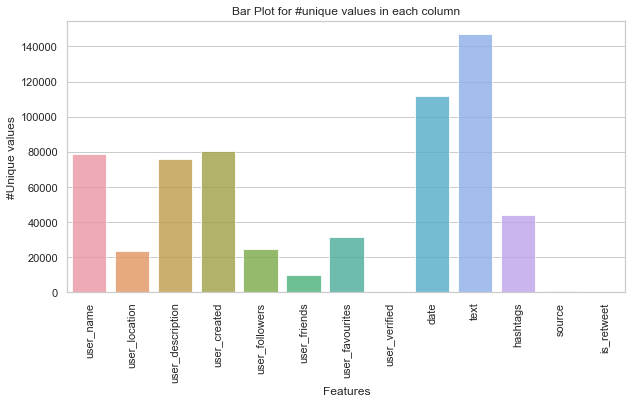

In [17]:
f, ax = plt.subplots(1,1, figsize=(10,5))#plt.figure(figsize=(10, 5))
sns.barplot(x = udf['Features'], y = udf['Uniques'], alpha = 0.8)
plt.title("Bar Plot for #unique values in each column")
plt.ylabel("#Unique values", fontsize = 12)
plt.xlabel("Features", fontsize = 12)
plt.xticks(rotation = 90)
plt.show()

# Frequency of users tweeting about corona

In [18]:
def plot_frequency_charts(df, feature, title, pallete):
    freq_df = pd.DataFrame()
    freq_df[feature] = df[feature]
    
    f, ax = plt.subplots(1,1, figsize=(16,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette=pallete)
    g.set_title("Number and percentage of {}".format(title))

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 

    plt.title('Frequency of {} tweeting about Corona'.format(feature))
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(title, fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

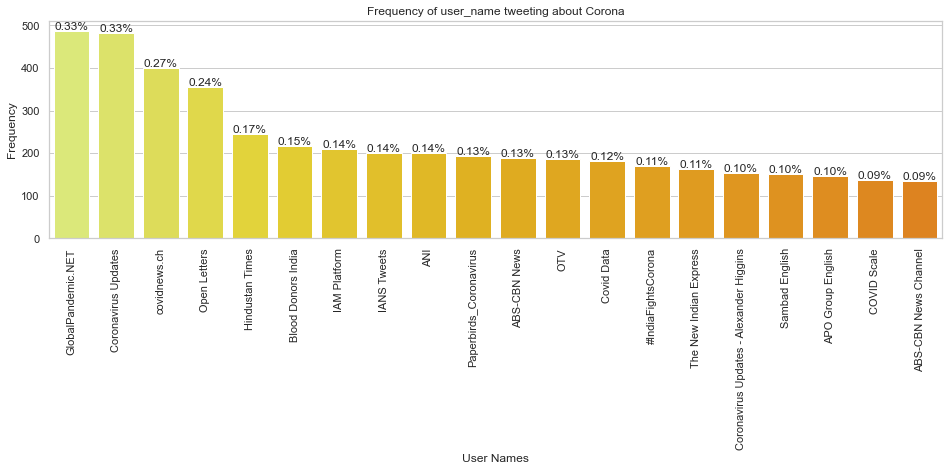

In [20]:
plot_frequency_charts(tweets, 'user_name', 'User Names','Wistia')

Frequency of locations tweeting about corona

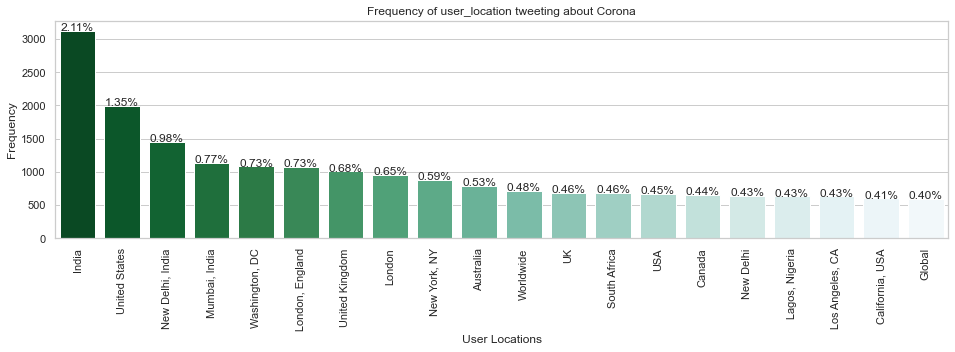

In [22]:
plot_frequency_charts(tweets, 'user_location', 'User Locations', 'BuGn_r')

Frequency of sources tweeting about corona

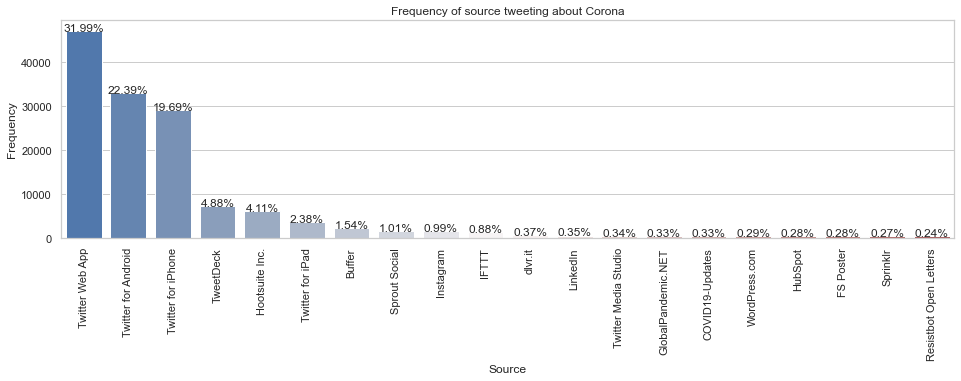

In [23]:
plot_frequency_charts(tweets, 'source','Source', 'vlag')

Visualizing top 30 words location wise

In [25]:
from string import punctuation
from nltk.corpus import stopwords
print(stopwords.words('english')[10:15])

def punctuation_stopwords_removal(sms):
    # filters charecter-by-charecter : ['h', 'e', 'e', 'l', 'o', 'o', ' ', 'm', 'y', ' ', 'n', 'a', 'm', 'e', ' ', 'i', 's', ' ', 'p', 'u', 'r', 'v', 'a']
    remove_punctuation = [ch for ch in sms if ch not in punctuation]
    # convert them back to sentences and split into words
    remove_punctuation = "".join(remove_punctuation).split()
    filtered_sms = [word.lower() for word in remove_punctuation if word.lower() not in stopwords.words('english')]
    return filtered_sms

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\Horizon/nltk_data'
    - 'C:\\Users\\Horizon\\anaconda3\\nltk_data'
    - 'C:\\Users\\Horizon\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\Horizon\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Horizon\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************
